In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os
import seaborn as sns
from enum import Enum
from sklearn.model_selection import GridSearchCV

class ANNskLearnType(Enum):
    regular = 1
    crossVal = 2
    gridSearch = 3
    gridSearchML = 4

In [131]:
annSkLearnImports()

In [2]:
def loadDataFromPath(thisPath, relativeDataPath):
    sys.path.append(thisPath)
    df = pd.read_csv(relativeDataPath)
    return df

In [3]:
thisPath = '.\\'
relativeDataPath = 'data\\heart-failure-clinical-data\\heart_failure_clinical_records_dataset.csv'
df = loadDataFromPath(thisPath, relativeDataPath)

In [4]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [5]:
def removeCategories(df):
    feature_cols = df.columns.tolist()
    #print("all feature columns", feature_cols)
    count = 0
    popped_features = []
    for i in range(len(feature_cols)):
        if isinstance(df.loc[0, feature_cols[count]], str):
            temp = feature_cols.pop(count)
            popped_features.append(temp)
            if count == 0:
                count = 0;
            else:
                count = count
        else:
            count = count + 1
    #print("feature columns without categorical items", feature_cols)   
    return feature_cols, popped_features   

In [6]:
def assignFeaturesLabelsFromDF(df, labelIdx, removeColumn):
    feature_cols, popped_features = removeCategories(df)
    label = feature_cols.pop(labelIdx)
    feature_cols.remove(removeColumn)
    return feature_cols, label
    

In [7]:
labelIdx = -1
removeColumn = 'time'
features, label = assignFeaturesLabelsFromDF(df, labelIdx, removeColumn)

In [8]:
features

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking']

In [9]:
label

'DEATH_EVENT'

### Assign Input Variables

In [10]:
X = df[features]
y = df[label]

In [11]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1


### Standardize features to prevent one feature from dominating the other

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def standardizeFeatures(df):
    scaler = StandardScaler()
    return scaler.fit_transform(df)

In [13]:
X = standardizeFeatures(X)

In [14]:
X

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
        -1.50403612e+00,  7.35688190e-01, -6.87681906e-01],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
        -1.41976151e-01,  7.35688190e-01, -6.87681906e-01],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
        -1.73104612e+00,  7.35688190e-01,  1.45416070e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
         3.12043840e-01, -1.35927151e+00, -6.87681906e-01],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.66063830e-01,  7.35688190e-01,  1.45416070e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
        -1.41976151e-01,  7.35688190e-01,  1.45416070e+00]])

### Split the dataset into training & testing

In [15]:
from sklearn.model_selection import train_test_split
def splitData(X, y, testSize, randomState):
    return train_test_split(X, y, test_size=testSize, random_state=randomState)

In [16]:
X_train, X_test, y_train, y_test = splitData(X, y, 0.2, 2)
print("size of training data")
print(X_train.shape)
print(y_train.shape)
print("size of testing data")
print(X_test.shape)
print(y_test.shape)

size of training data
(239, 11)
(239,)
size of testing data
(60, 11)
(60,)


In [17]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
def rocCurve(y_test, y_predict, dataSet):
    fpr, tpr, thresholds = roc_curve(y_test, y_predict)
    auc = roc_auc_score(y_test, y_predict)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC={auc:.2f})')
    plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random Guess')
    plt.title(f"ROC Curve: {dataSet}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

### ANN Classifier
#### Instantiate an object from the sklearn "MPLClassifier" (multi layer perceptron)

In [42]:
# "my_ANN" is instantiated as an "object" of MLPClassifier "class". 
# hidden_layer_sizes: The i-th element represents the number of neurons in the i-th hidden layer.
# activation: the non-linear function. 'logistic' means Sigmoid Function!
# solver: the type of minimization problem: ‘sgd’ and 'adam' refer to stochastic gradient descent.
# alpha: regularization parameter (L2 penalty term).
# learning_rate_init: learning rate.
# batch_sizeint: Size of minibatches for stochastic optimizers.
# verbosebool: Whether to print progress
# tol: Tolerance for the optimization. When the loss/score is not improving by at least tol in consecutive iterations. 
def myANNskLearn(hidden_layer_sizes, max_iter, activation, solver, alpha, random_state, learning_rate_init, verbose, tol, X_train, y_train, X_test, y_test, annModelType, X, y):
    my_ANN = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, activation=activation, 
                       solver=solver, alpha=alpha, random_state=random_state, 
                       learning_rate_init=learning_rate_init, verbose=verbose, tol=tol)
    if annModelType == ANNskLearnType.regular:
        my_ANN.fit(X_train, y_train)# train on training data
        print(my_ANN.coefs_)# Weights: The ith element in the list represents the weight matrix corresponding to layer i.
        print('\n')
        print(my_ANN.intercepts_) # Bias weights: The ith element in the list represents the bias vector corresponding to layer i + 1.
        y_predict_ann = my_ANN.predict(X_test)
        print("y_predict values")
        print(y_predict_ann)
        print("y_test values")
        print(y_test)
        # We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
        score_ann = accuracy_score(y_test, y_predict_ann)
        print('\n','accuracy: ',score_ann)
        y_predict_prob_ann = my_ANN.predict_proba(X_test)
        print("probalities of each sample belonging to predicted classes")
        print(y_predict_prob_ann)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_ann[:,1], pos_label=1)# slice the 2d list y_predict_prob_ann to get all prob of +ve's
        print("False positive rates")
        print(fpr)
        print("\n\n\n")
        print("True positive rates")
        print(tpr)
        AUC = metrics.auc(fpr, tpr)
        print("AUC")
        print(AUC)
        dataSet = "HeartFailure_Data model via ANN MPLClassifier"
        rocCurve(y_test, y_predict_ann, dataSet) # 
        cm_ANN = metrics.confusion_matrix(y_test, y_predict_ann)
        print("Confusion matrix:")
        print(cm_ANN)
        print("True Negatives", cm_ANN[0][0])
        print("True Positives", cm_ANN[1][1])
        print("False Positive", cm_ANN[0][1])
        print("False Negatives", cm_ANN[1][0])
        cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
        sns.heatmap(cm_ANN/np.sum(cm_ANN), cmap = cmap1, annot = True, annot_kws = {'size':25})
        #y_pred = my_ANN.predict(X_test)
        print(classification_report(y_test, y_predict_ann))
        
    elif annModelType == ANNskLearnType.crossVal:
        # CV:
        accuracy_list = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')
        print('\n\n','accuracy of Cross Validatios: ',accuracy_list)
        accuracy_cv = accuracy_list.mean()
        print("mean accuracy of cross-val")
        print(accuracy_cv)
        cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
        y_pred = cross_val_predict(my_ANN, X_test, y_test, cv=cv)
        print(classification_report(y_test, y_pred))

        y_probs = cross_val_predict(my_ANN, X_test, y_test, cv=cv, method='predict_proba')
        y_probs_class_1 = y_probs[:, 1]
        dataSet = "HeartFailure_Data model via ANN MPLClassifier Cross Validation 10 fold"
        rocCurve(y_test, y_probs_class_1, dataSet)
        
    elif annModelType == ANNskLearnType.gridSearch:
        neuron_number = [(i,) for i in range(hidden_layer_sizes[0], hidden_layer_sizes[1])]
        # create a dictionary for grid parameter:
        param_grid = dict(hidden_layer_sizes = neuron_number)
        print(param_grid,'\n')
        
        # instantiate the model:
        my_ANN = MLPClassifier(activation=activation, solver=solver, 
                                                 alpha=alpha, random_state=random_state, 
                                                  learning_rate_init=learning_rate_init,
                                                  verbose=verbose, tol=tol, max_iter=max_iter)
        
        # creat the grid, and define the metric for evaluating the model: 
        grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')
        
        # fit the grid (start the grid search):
        grid.fit(X_train, y_train)
        
        # view the results:
        #print(grid.cv_results_)
        
        # view the best results corresponding to the best structure of ANN:
        print("Test score", grid.best_score_)
        print(grid.best_params_)
        best_model = grid.best_estimator_
        dataSet = "HeartFailure_Data model via ANN MPLClassifier Gridsearch 1 Layer"
        y_proba = best_model.predict_proba(X_test)[:, 1]
        rocCurve(y_test, y_proba, dataSet)
        y_pred = best_model.predict(X_test)
        print(classification_report(y_test, y_pred))
        
    elif annModelType == ANNskLearnType.gridSearchML:    
        # define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
        neuron_number = [(i,j) for i in range(hidden_layer_sizes[0],hidden_layer_sizes[1]) for j in range(hidden_layer_sizes[0],hidden_layer_sizes[1])]                    
        
        # create a dictionary for grid parameter:
        param_grid = dict(hidden_layer_sizes = neuron_number)
        print(param_grid,'\n')
        
        # instantiate the model:
        my_ANN = MLPClassifier(activation=activation, solver=solver, 
                                                 alpha=alpha, random_state=random_state, 
                                                 learning_rate_init = learning_rate_init, max_iter=max_iter)
        
        # creat the grid, and define the metric for evaluating the model: 
        grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')
        
        # fit the grid (start the grid search):
        grid.fit(X, y)
        
        # view the results:
        # print(grid.cv_results_)
        
        # view the best results corresponding to the best structure of ANN:
        print(grid.best_score_)
        print(grid.best_params_)

        best_model = grid.best_estimator_
        dataSet = "HeartFailure_Data model via ANN MPLClassifier Gridsearch 2 Layer"
        y_proba = best_model.predict_proba(X_test)[:, 1]
        rocCurve(y_test, y_proba, dataSet)
        y_pred = best_model.predict(X_test)
        print(classification_report(y_test, y_pred))
        
    
    
    
    

Iteration 1, loss = 0.79106700
Iteration 2, loss = 0.65475591
Iteration 3, loss = 0.60963859
Iteration 4, loss = 0.59326299
Iteration 5, loss = 0.58507011
Iteration 6, loss = 0.57731868
Iteration 7, loss = 0.56372717
Iteration 8, loss = 0.54808075
Iteration 9, loss = 0.53503328
Iteration 10, loss = 0.52395529
Iteration 11, loss = 0.51746910
Iteration 12, loss = 0.51097430
Iteration 13, loss = 0.50508618
Iteration 14, loss = 0.49879032
Iteration 15, loss = 0.49346335
Iteration 16, loss = 0.48929345
Iteration 17, loss = 0.48781320
Iteration 18, loss = 0.48954354
Iteration 19, loss = 0.48977408
Iteration 20, loss = 0.48739229
Iteration 21, loss = 0.48158695
Iteration 22, loss = 0.47695943
Iteration 23, loss = 0.47619273
Iteration 24, loss = 0.47742148
Iteration 25, loss = 0.47835919
Iteration 26, loss = 0.47670189
Iteration 27, loss = 0.47231167
Iteration 28, loss = 0.47121722
Iteration 29, loss = 0.46880972
Iteration 30, loss = 0.46781554
Iteration 31, loss = 0.46563017
Iteration 32, los

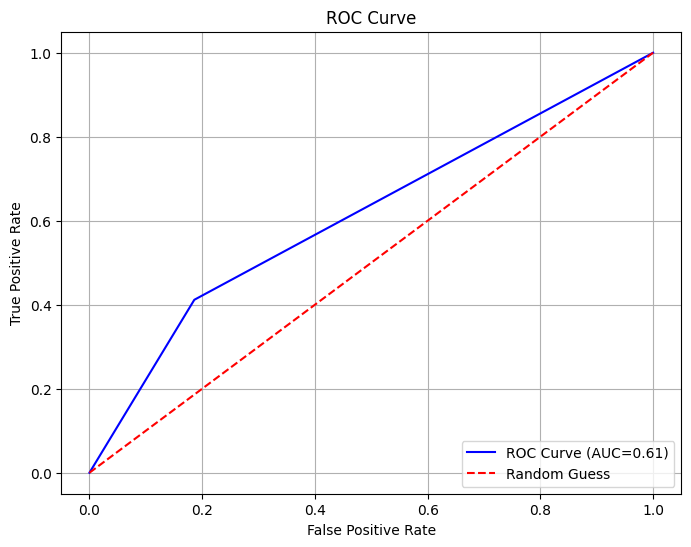

Confusion matrix:
[[35  8]
 [10  7]]
True Negatives 35
True Positives 7
False Positive 8
False Negatives 10


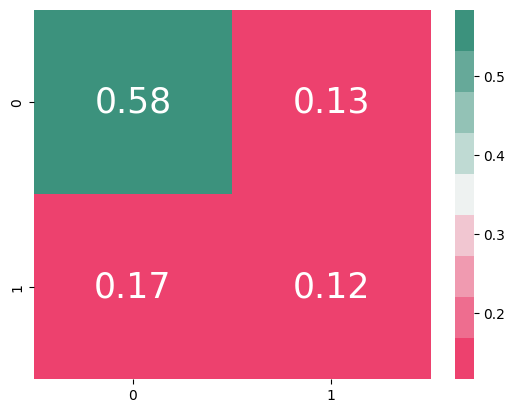

In [183]:
# Implenting a simple neural network
# 1 Hidden Layer with 3 neurons:
annModelType = ANNskLearnType.regular
hidden_layer_sizes = (3,)
max_iter = 1000
activation = 'logistic'
solver = 'adam'
alpha = 1e-5
random_state = 1
learning_rate_init = 0.1
verbose=True
tol = 0.0001
myANNskLearn(hidden_layer_sizes, max_iter, activation, solver, alpha, random_state, learning_rate_init, verbose, tol, X_train, y_train, X_test, y_test, annModelType, X, y)

Iteration 1, loss = 0.78969274
Iteration 2, loss = 0.64559590
Iteration 3, loss = 0.63132259
Iteration 4, loss = 0.65664410
Iteration 5, loss = 0.65090091
Iteration 6, loss = 0.62117477
Iteration 7, loss = 0.60227590
Iteration 8, loss = 0.59897684
Iteration 9, loss = 0.60341046
Iteration 10, loss = 0.59528363
Iteration 11, loss = 0.57549991
Iteration 12, loss = 0.55736313
Iteration 13, loss = 0.54247180
Iteration 14, loss = 0.53162620
Iteration 15, loss = 0.52080899
Iteration 16, loss = 0.51098948
Iteration 17, loss = 0.50282373
Iteration 18, loss = 0.49902689
Iteration 19, loss = 0.49716814
Iteration 20, loss = 0.49551710
Iteration 21, loss = 0.49268241
Iteration 22, loss = 0.48860626
Iteration 23, loss = 0.48319230
Iteration 24, loss = 0.48227567
Iteration 25, loss = 0.47942745
Iteration 26, loss = 0.47433032
Iteration 27, loss = 0.47107059
Iteration 28, loss = 0.46731659
Iteration 29, loss = 0.46672018
Iteration 30, loss = 0.46413406
Iteration 31, loss = 0.45957973
Iteration 32, los

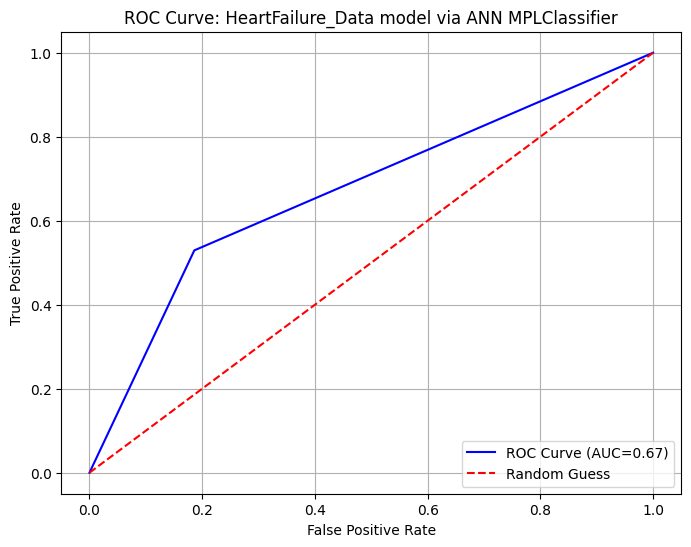

Confusion matrix:
[[35  8]
 [ 8  9]]
True Negatives 35
True Positives 9
False Positive 8
False Negatives 8
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        43
           1       0.53      0.53      0.53        17

    accuracy                           0.73        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.73      0.73      0.73        60



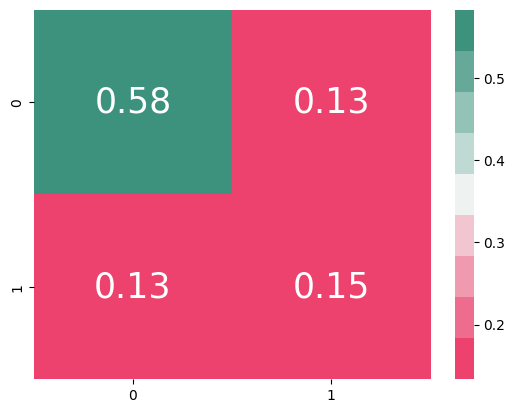

In [27]:
# Implenting a complex neural network
# 2 Hidden Layers, first one with 6 neurons, second with 4 neurons:
annModelType = ANNskLearnType.regular
hidden_layer_sizes = (6,4)
max_iter = 1000
activation = 'logistic'
solver = 'adam'
alpha = 1e-5
random_state = 1
learning_rate_init = 0.1
verbose=True
tol = 0.0001
myANNskLearn(hidden_layer_sizes, max_iter, activation, solver, alpha, random_state, learning_rate_init, verbose, tol, X_train, y_train, X_test, y_test, annModelType, X, y)

### Applying 10-fold Cross Validation for ANN classifier:



 accuracy of Cross Validatios:  [0.7        0.7        0.66666667 0.66666667 0.8        0.63333333
 0.73333333 0.76666667 0.86666667 0.75862069]
mean accuracy of cross-val
0.7291954022988506
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        43
           1       0.38      0.35      0.36        17

    accuracy                           0.65        60
   macro avg       0.56      0.56      0.56        60
weighted avg       0.64      0.65      0.65        60



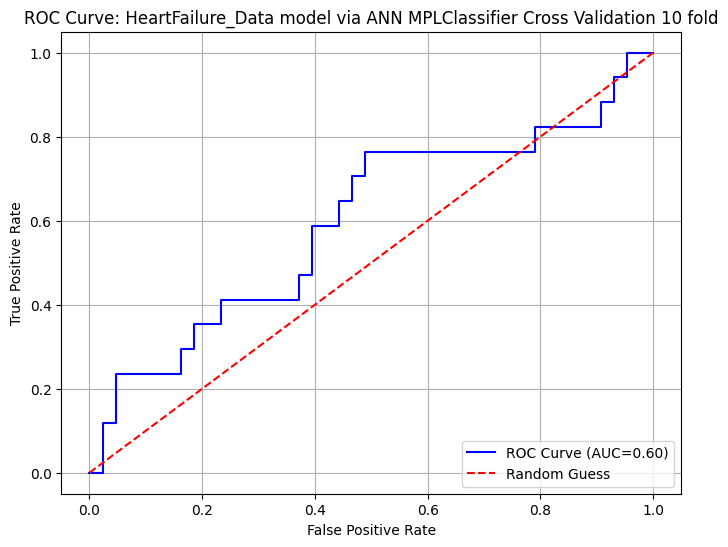

In [43]:
# Implenting a simple neural network
# 1 Hidden Layer with 3 neurons:
annModelType = ANNskLearnType.crossVal
hidden_layer_sizes = (3,)
max_iter = 1000
activation = 'logistic'
solver = 'adam'
alpha = 1e-5
random_state = 1
learning_rate_init = 0.1
verbose=False
tol = 0.0001
myANNskLearn(hidden_layer_sizes, max_iter, activation, solver, alpha, random_state, learning_rate_init, verbose, tol, X_train, y_train, X_test, y_test, annModelType, X, y)

### Accuracy did not change much with cross val

{'hidden_layer_sizes': [(2,), (3,), (4,), (5,), (6,), (7,), (8,)]} 

Test score 0.757427536231884
{'hidden_layer_sizes': (6,)}


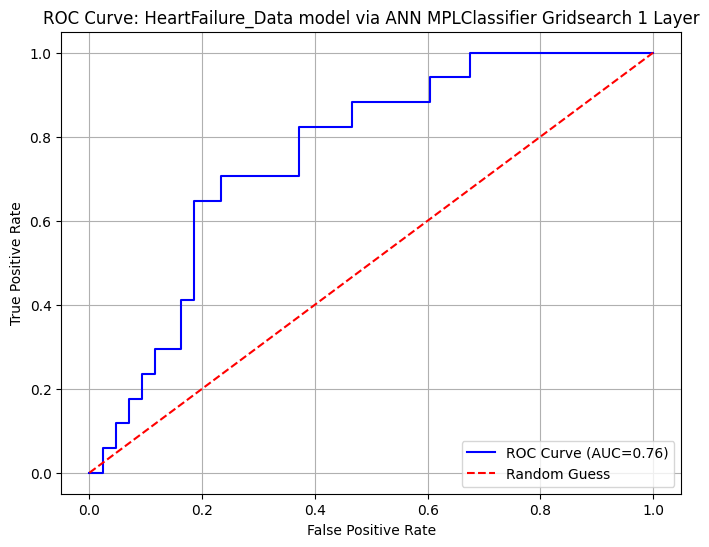

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        43
           1       0.55      0.65      0.59        17

    accuracy                           0.75        60
   macro avg       0.70      0.72      0.71        60
weighted avg       0.77      0.75      0.76        60



In [23]:
### Try Grid Search. Determine best ANN structure with 1 layer
annModelType = ANNskLearnType.gridSearch
hidden_layer_sizes = (2,9)
max_iter = 1000
activation = 'logistic'
solver = 'adam'
alpha = 1e-5
random_state = 1
learning_rate_init = 0.1
verbose=False
tol = 0.0001
myANNskLearn(hidden_layer_sizes, max_iter, activation, solver, alpha, random_state, learning_rate_init, verbose, tol, X_train, y_train, X_test, y_test, annModelType, X, y)


{'hidden_layer_sizes': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)]} 

0.7428735632183907
{'hidden_layer_sizes': (1, 8)}


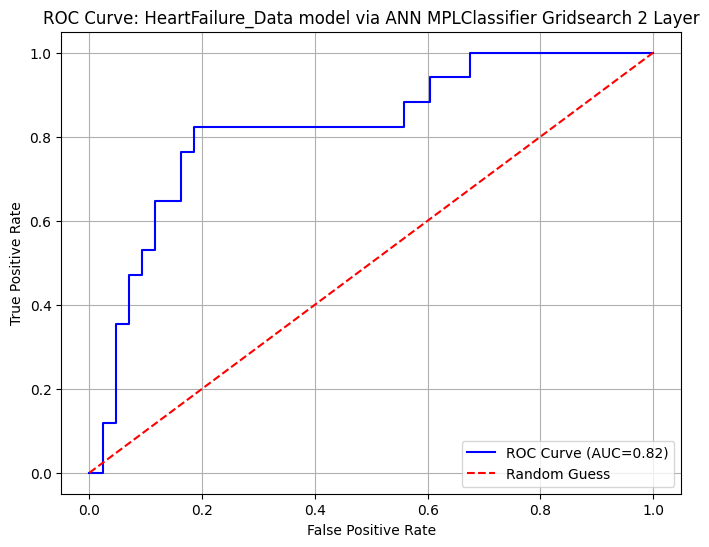

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        43
           1       0.62      0.76      0.68        17

    accuracy                           0.80        60
   macro avg       0.76      0.79      0.77        60
weighted avg       0.82      0.80      0.81        60



In [25]:
### Try Grid Search. Determine best ANN structure with 2 layers
annModelType = ANNskLearnType.gridSearchML
hidden_layer_sizes = (1,9)
max_iter = 1000
activation = 'logistic'
solver = 'adam'
alpha = 1e-5
random_state = 1
learning_rate_init = 0.1
verbose=False
tol = 0.0001
myANNskLearn(hidden_layer_sizes, max_iter, activation, solver, alpha, random_state, learning_rate_init, verbose, tol, X_train, y_train, X_test, y_test, annModelType, X, y)


### ANN Classifier
#### Keras & TensorFlow

In [44]:
from keras import callbacks
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

def myANNkerasTensorFlow(X_train, y_train, batch_size, epochs, validation_split, y_test):
    early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

    # Initialising the NN
    model = Sequential()
    
    # layers
    model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    # Compiling the ANN
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    # Train the ANN
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split, callbacks=early_stopping)
    val_accuracy = np.mean(history.history['val_accuracy'])
    print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))

    history_df = pd.DataFrame(history.history)

    plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
    plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
    plt.title('Training and Validation loss ANN Keras')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc="best")
    
    plt.show()

    history_df = pd.DataFrame(history.history)

    plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
    plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')
    
    plt.title('Training and Validation accuracy Keras')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Predicting the test set results
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.4)
    np.set_printoptions()

    # Getting the confusion matrix
    cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
    plt.subplots(figsize=(10,7))
    cf_matrix = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})
    print(classification_report(y_test, y_pred))

    dataSet = "HeartFailure_Data modelling via ANN Keras TensorFlow"
    rocCurve(y_test, y_pred, dataSet)


Epoch 1/80


C:\Users\hadit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6377 - loss: 0.6927 - val_accuracy: 0.6167 - val_loss: 0.6922
Epoch 2/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6937 - loss: 0.6913 - val_accuracy: 0.6167 - val_loss: 0.6914
Epoch 3/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6980 - loss: 0.6897 - val_accuracy: 0.6167 - val_loss: 0.6904
Epoch 4/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7000 - loss: 0.6880 - val_accuracy: 0.6167 - val_loss: 0.6894
Epoch 5/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6806 - loss: 0.6870 - val_accuracy: 0.6167 - val_loss: 0.6884
Epoch 6/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6940 - loss: 0.6848 - val_accuracy: 0.6167 - val_loss: 0.6872
Epoch 7/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6723 - loss: 0.6837 - val_accuracy: 0.6167 - val_loss: 0.6860
Epoch 8/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6710 - loss: 0.6818 - val_accuracy: 0.6167 - val_loss: 0.6846
Epoch 9/80


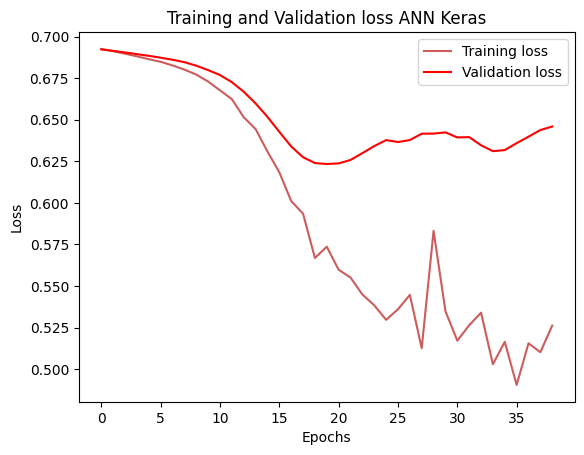

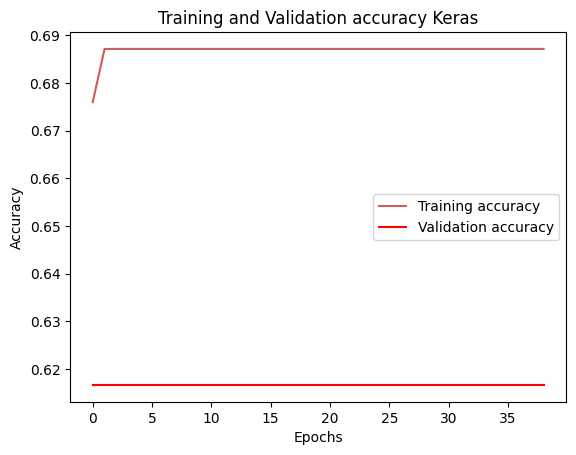

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        43
           1       0.64      0.53      0.58        17

    accuracy                           0.78        60
   macro avg       0.73      0.71      0.72        60
weighted avg       0.77      0.78      0.78        60



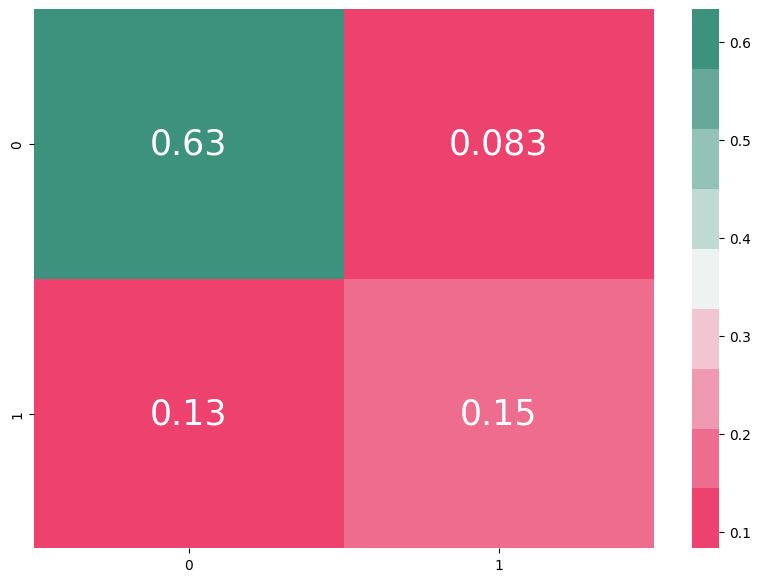

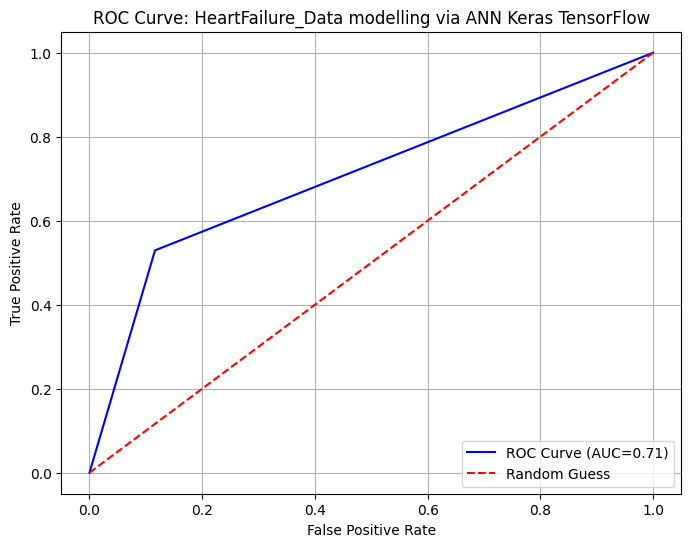

In [45]:
batch_size = 25
epochs = 80
validation_split=0.25
myANNkerasTensorFlow(X_train, y_train, batch_size, epochs, validation_split, y_test)